In [ ]:
---
title: Practice Activity 7.2
author: Sneha Narayanan
format:
    html:
        toc: true
        code-fold: true
embed-resources: true
theme: "Lumen"

---

In [12]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from plotnine import *

In [2]:
ames = pd.read_csv("AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()

In [5]:
ames

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,8885,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [3]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

### 1.1 Notice in the Column Transformer, we added the argument handle_unknown='ignore'What did this accomplish?

The handle_unknown='ignore' argument in the OneHotEncoder within the ColumnTransformer ensures that when the model encounters categories during prediction that were not present during training, it will not throw an error. Instead, it will ignore those unseen categories and encode them as all-zero vectors.

### 1.2 Notice in the OneHotEncoder, we used make_column_selector(dtype_include=object) instead of supplying column names. What did this accomplish?

Automatically selects all categorical columns (object dtype) without specifying column names, making the code more flexible and adaptable.

### 1.3 Why did we drop the Order and PID columns?

Order and PID have unique values which is not useful in predicting the 'SalePrice'.

In [4]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([-1.08138223e+20, -1.43333757e+20, -1.73249837e+22, -4.41795802e+19,
       -2.03737393e+19])

In [100]:
scores = cross_val_score(lr_pipeline_1, X, y, cv=5, scoring='r2')
scores

array([-1.08138223e+20, -1.43333757e+20, -1.73249837e+22, -4.41795802e+19,
       -2.03737393e+19])

In [105]:
lr_pipeline_1_fit = lr_pipeline_1.fit(X, y)

In [106]:
linear_coef=lr_pipeline_1_fit.named_steps['linear_regression'].coef_

### 1.4 Make a pipeline that uses all the variables in the Ames dataset, and then fits Ridge Regression with 
.

Cross-validate this pipeline and compare the results to the ordinary linear regression.

Then fit the model on the whole dataset and get the coefficients. Make a plot of these coefficients compared to the ones from ordinary linear regression.

In [108]:
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'), 
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
)
ridge_pipeline = Pipeline([
    ("preprocessing", ct),
    ("ridge_regression", Ridge(alpha=1))
])

ridge_cv_scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')

In [110]:
scores_rid = cross_val_score(ridge_pipeline, X, y, cv = 5, scoring = 'r2')
scores_rid

array([0.89815807, 0.91744024, 0.79493606, 0.78522563, 0.91389818])

In [111]:
ridge_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1761e7910>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x172e5e7d0>)])),
                ('ridge_regression', Ridge(alpha=1))])

In [112]:
ridge_coefficients = ridge_pipeline.named_steps['ridge_regression'].coef_

In [22]:
coeff_df = pd.DataFrame({
    "Feature": X.columns.tolist() + [f"Dummy_{i}" for i in range(len(ridge_coefficients) - len(X.columns))],
    "Ridge Coefficients": ridge_coefficients,
    "Linear Regression Coefficients": lr_coefficients
})

coeff_df_melted = coeff_df.melt(id_vars=["Feature"], 
                                 value_vars=["Ridge Coefficients", "Linear Regression Coefficients"],
                                 var_name="Model", value_name="Coefficient Value")

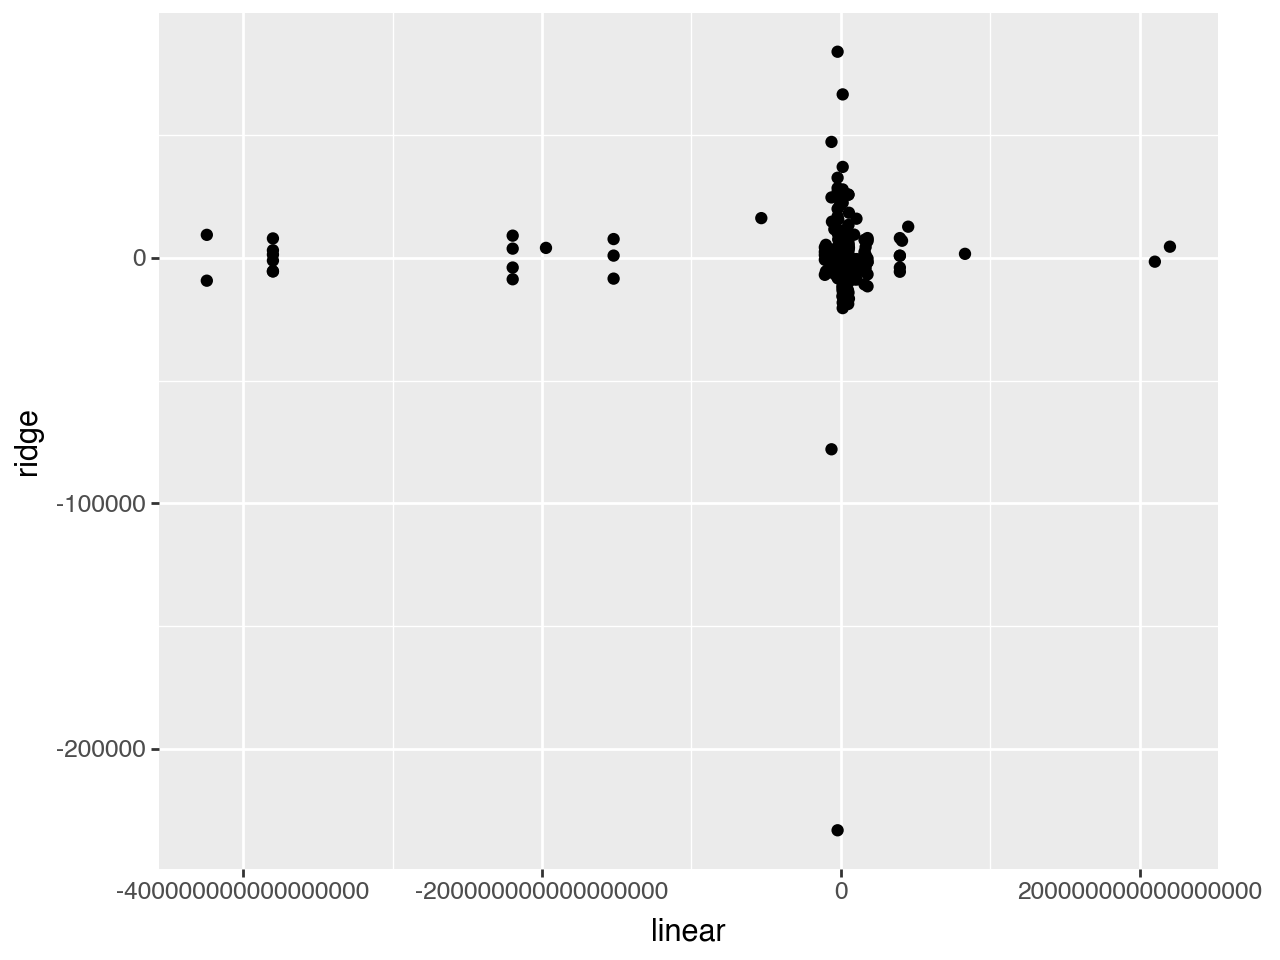

In [28]:
df_coeff = pd.DataFrame({"linear": lr_coefficients,
                         "ridge": ridge_coefficients})
df_coeff['y_axis'] = 0
df_coeff

from plotnine import *
(ggplot(df_coeff, aes(x = "linear", y = "ridge"))
 + geom_point())

from plotnine import *
(ggplot(df_coeff, aes(x = "linear", y = "ridge"))
+ geom_point())

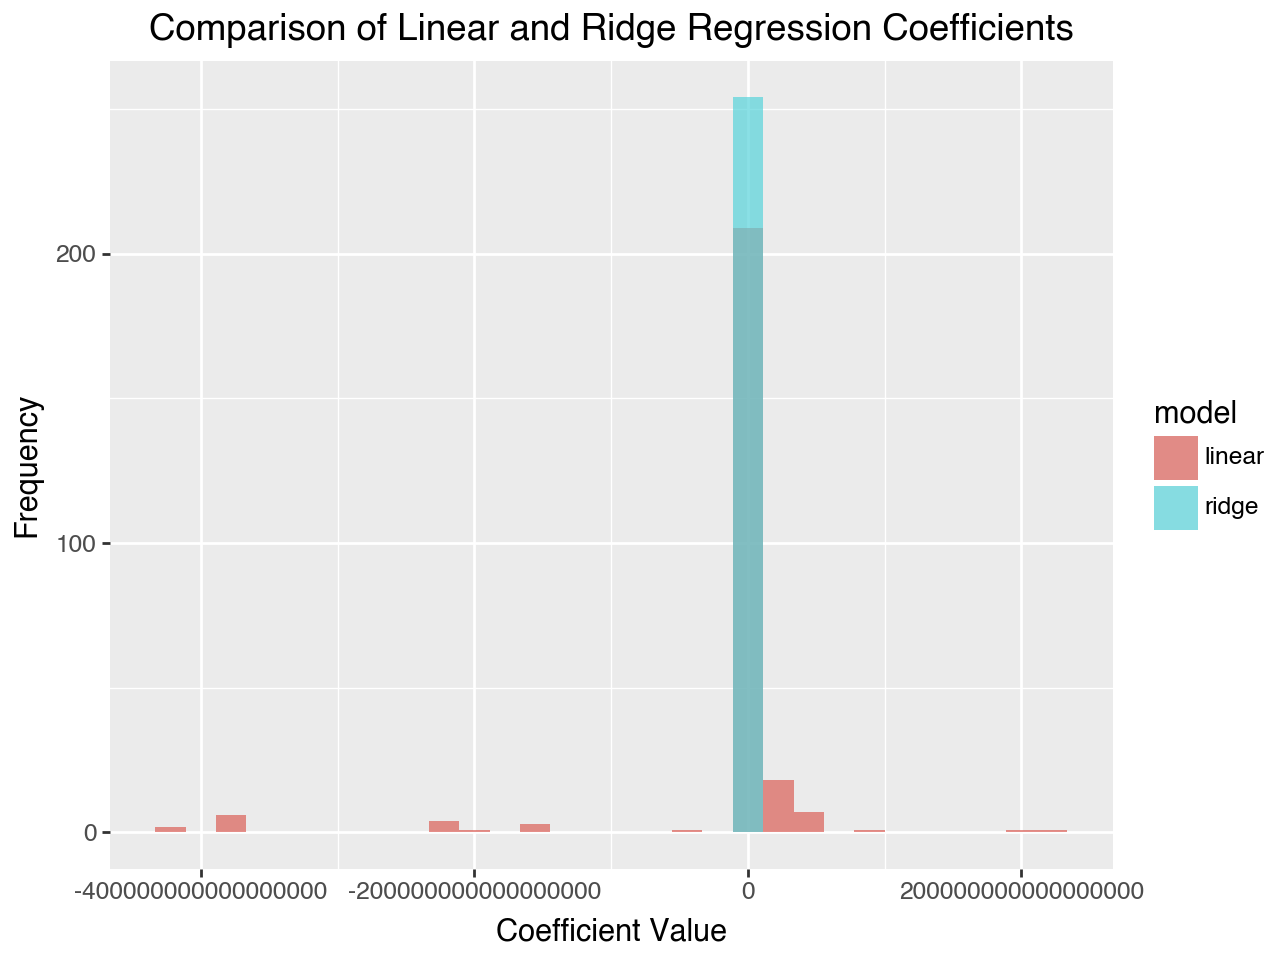

In [29]:
df_coeff = pd.DataFrame({"linear": lr_coefficients,
                         "ridge": ridge_coefficients})

df_long = pd.melt(df_coeff, var_name='model', value_name='coefficient')

(ggplot(df_long, aes(x='coefficient', fill='model'))
 + geom_histogram(bins=30, alpha=0.7, position='identity')
 + labs(title='Comparison of Linear and Ridge Regression Coefficients',
        x='Coefficient Value', y='Frequency')
)

In [34]:
from sklearn.model_selection import GridSearchCV, train_test_split
param_grid = {
    "ridge_regression__alpha": [0.001, 0.01, 0.1, 1, 10]
}


grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring="r2", verbose=1)

gscv_fit= grid_search.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [35]:
pd.DataFrame(gscv_fit.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge_regression__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035464,0.010866,0.009135,0.000977,0.001,{'ridge_regression__alpha': 0.001},0.897285,0.910406,0.789016,0.772132,0.900762,0.853920,0.060278,5
1,0.026464,0.000779,0.007895,0.000179,0.010,{'ridge_regression__alpha': 0.01},0.897343,0.910614,0.789126,0.772532,0.901317,0.854186,0.060280,4
2,0.026584,0.001879,0.007755,0.000158,0.100,{'ridge_regression__alpha': 0.1},0.897744,0.912306,0.790110,0.775764,0.905587,0.856302,0.060250,3
3,0.026350,0.000708,0.007997,0.000393,1.000,{'ridge_regression__alpha': 1},0.898158,0.917440,0.794936,0.785226,0.913898,0.861932,0.059104,2
4,0.026650,0.001823,0.007955,0.000292,10.000,{'ridge_regression__alpha': 10},0.897762,0.920812,0.800572,0.787120,0.915095,0.864272,0.058157,1


In [36]:
scores = gscv_fit.cv_results_['mean_test_score']
scores

array([0.85392021, 0.85418638, 0.85630206, 0.86193163, 0.86427221])

In [37]:
pd.DataFrame(data = {"alpha": gscv_fit.cv_results_['param_ridge_regression__alpha'], "scores": gscv_fit.cv_results_['mean_test_score']}).sort_values(by = "scores", ascending = False)

,alpha,scores
4,10.000,0.864272
3,1.000,0.861932
2,0.100,0.856302
1,0.010,0.854186
0,0.001,0.853920


## Create a LASSO pipeline, and tune lambda.

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS

In [113]:
lasso_pipeline = Pipeline([
    ("preprocessor", ct),
    ("lasso", Lasso())
])

In [114]:
cv_scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring="r2")

/Users/snehanarayanan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+10, tolerance: 1.477e+09


In [115]:
lasso_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1761e7910>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x172e5e7d0>)])),
                ('lasso', Lasso())])

In [116]:
lasso_coefficients = lasso_pipeline.named_steps["lasso"].coef_
lasso_coefficients

array([-4.81652839e+03,  1.22724439e+03, -4.41885541e+03,  7.51982576e+03,
        3.53293929e+03, -1.15175663e+03, -2.04473222e+04,  3.92049217e-09,
       -1.41031927e+03,  4.70209827e+03,  4.83124102e+02, -1.26904092e+01,
       -9.03194952e+03,  5.48345937e+03, -1.09548228e+04,  1.19715987e+02,
        1.48059948e+04, -2.46716222e+03,  0.00000000e+00,  2.89970113e+02,
        6.47083982e+03, -6.06559741e+03, -4.80860054e+03, -0.00000000e+00,
       -0.00000000e+00,  6.66914878e+03, -1.63491350e+04,  3.88720104e+03,
        1.02876243e+04,  1.35648346e+04,  1.05643345e+03, -4.16387582e+03,
       -6.38723226e+03,  1.16048567e+04, -1.37388021e+04, -7.33924495e+03,
        1.20934300e+04,  1.32015734e+05, -5.39197495e+03,  0.00000000e+00,
        7.56702466e+03, -1.01640833e+04, -1.01751839e+04,  1.84286710e+04,
       -1.33019305e+04,  3.10914289e+04,  2.52024813e+04, -9.36511398e+03,
       -7.37390650e+03, -5.84233241e+03, -7.33009072e+03,  1.60093014e+04,
        4.27819615e+04, -

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "lasso__alpha": [0.001, 0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring="r2")
grid_search.fit(X, y)

best_lasso_model = grid_search.best_estimator_
best_alpha_lasso = grid_search.best_params_["lasso__alpha"]
print(f"Best alpha for LASSO: {best_alpha_lasso}")

best_lasso_model.fit(X, y)
lasso_coefficients = best_lasso_model.named_steps["lasso"].coef_

print("LASSO Coefficients with best alpha:", lasso_coefficients)

/Users/snehanarayanan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 1.348e+09
/Users/snehanarayanan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09
/Users/snehanarayanan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e+11, tolerance: 1.463e+09
/Users/snehanarayan

Best alpha for LASSO: 10
LASSO Coefficients with best alpha: [-4.51898958e+03  0.00000000e+00 -0.00000000e+00  4.59256134e+03
  2.31827307e+03 -2.08235173e+03 -1.70965918e+04  8.33370201e-10
 -1.16351324e+03  4.37136675e+03 -0.00000000e+00  0.00000000e+00
 -9.49462247e+03  5.42684544e+03 -9.44561591e+03  1.35861380e+02
  3.64335710e+03 -0.00000000e+00 -0.00000000e+00  7.90332217e+01
  6.36350586e+03 -5.95620348e+03 -2.90507491e+03  0.00000000e+00
 -0.00000000e+00  6.16612008e+03 -1.10426840e+04  4.81758840e+03
  8.94742519e+03  1.31928184e+04  3.75089101e+03 -0.00000000e+00
 -2.66427635e+03  1.46845352e+04 -1.01570542e+04 -3.79902131e+03
  1.02574836e+04  1.09304458e+05 -2.35734919e+03  0.00000000e+00
  7.12699605e+03 -6.36780861e+03 -6.32679579e+03  1.49640904e+04
 -9.25353657e+03  3.49564239e+04  2.80292835e+04 -6.33356337e+03
 -3.72792988e+03 -1.84028112e+03 -3.36693040e+03  1.87963345e+04
  4.46064027e+04 -3.30087424e+02 -2.60186271e+03 -1.33724270e+03
 -0.00000000e+00  8.09252946e

In [68]:
results = pd.DataFrame({
    "Lambda": param_grid["lasso__alpha"],
    "R²_ridge": gscv_fit.cv_results_['mean_test_score'],
    "Lasso R² Score": grid_search.cv_results_['mean_test_score']
})

results_sorted = results.sort_values(by="Lasso R² Score", ascending=False)
print(results_sorted.head())

   Lambda  R²_ridge  Lasso R² Score
4  10.000  0.864272        0.860632
3   1.000  0.861932        0.857152
2   0.100  0.856302        0.856607
1   0.010  0.854186        0.856566
0   0.001  0.853920        0.855601


Both models perform best at λ= 10 but achieve similar scores overall, with Ridge reaching 0.864 and LASSO 0.861.

Coefficient Comparison:

Ridge: Coefficients are generally smaller and more evenly distributed, as Ridge penalizes large coefficients, spreading influence across many features.
LASSO: With higher regularization, LASSO drives some coefficients to zero, performing feature selection and simplifying the model, which could enhance interpretability without drastically reducing performance compared to Ridge or OLS.

In [118]:
elastic_net_pipeline = Pipeline([
    ("preprocessor", ct),  
    ("elastic_net", ElasticNet())
])

In [119]:
cv_scores = cross_val_score(elastic_net_pipeline, X, y, cv=5, scoring="r2")

In [120]:
elastic_net_pipeline.fit(X, y)
default_elastic_net_coefficients = elastic_net_pipeline.named_steps["elastic_net"].coef_
default_elastic_net_coefficients

array([-1.41971922e+02,  3.49433582e+02, -2.03580414e+01, -5.50851860e+01,
        1.19278794e+03, -1.32280672e+03, -1.62088197e+02,  1.62088197e+02,
        1.20556585e+03,  4.53852497e+02, -3.23910163e+02, -1.33550888e+03,
       -1.01959675e+03,  1.78364939e+03,  3.73732791e+01, -8.01425975e+02,
        6.48076760e+01, -3.10352740e+01, -3.27724020e+01, -4.64171474e+02,
        1.06965273e+03, -3.89430628e+02, -4.94795451e+01, -1.63571034e+02,
       -7.68560979e+02,  8.11751119e+02, -4.21901543e+01, -2.80646693e+02,
       -1.70414981e+01, -2.17215254e+02,  2.65237116e+02,  2.72005729e+01,
       -1.07250023e+03,  1.18511274e+03, -1.16462268e+03, -9.82172859e+02,
        2.14559216e+01,  8.67592166e+01, -2.20022688e+02, -9.47995459e+00,
       -7.26218253e+01, -4.68320312e+02, -1.08213199e+03, -2.92015469e+01,
       -1.03046500e+03,  1.58235398e+03,  3.10851930e+03, -7.59182036e+02,
       -1.49004190e+02, -2.52738636e+02, -6.97839903e+02,  5.19177028e+02,
        1.64043545e+03, -

In [73]:
elastic_net_pipeline = Pipeline([
    ("preprocessor", ct),
    ("elastic_net", ElasticNet(max_iter=10000))
])

param_grid = {
    "elastic_net__alpha": [0.001, 0.01, 0.1, 1, 10],
    "elastic_net__l1_ratio": [0.1, 0.5, 0.7, 0.9]  # Mixing between LASSO and Ridge
}

grid_search = GridSearchCV(elastic_net_pipeline, param_grid, cv=5, scoring="r2")
grid_search.fit(X, y)

/Users/snehanarayanan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.831e+09, tolerance: 1.348e+09
/Users/snehanarayanan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.136e+09, tolerance: 1.474e+09
/Users/snehanarayanan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.619e+09, tolerance: 1.463e+09
/Users/snehanarayan

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('dummify',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x16e90fc10>),
                                                                        ('standardize',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x16c453910>)])),
                                       ('elastic_net',
                                        ElasticNet(max_iter=10000))]),
             param_grid={'elastic_net__alpha': [0.001, 0.01, 0.1, 1, 10],
                         'elastic_net__l1_ratio': [0.1, 0.5, 0.7, 0.9]},
             scoring='r2')

In [74]:
best_elastic_net_model = grid_search.best_estimator_
best_alpha_elastic_net = grid_search.best_params_["elastic_net__alpha"]
best_l1_ratio_elastic_net = grid_search.best_params_["elastic_net__l1_ratio"]

print(f"Best alpha for Elastic Net: {best_alpha_elastic_net}")
print(f"Best l1_ratio for Elastic Net: {best_l1_ratio_elastic_net}")

Best alpha for Elastic Net: 0.01
Best l1_ratio for Elastic Net: 0.5


In [75]:
best_elastic_net_model.fit(X, y)
best_elastic_net_coefficients = best_elastic_net_model.named_steps["elastic_net"].coef_

print("Elastic Net Coefficients with best alpha and l1_ratio:", best_elastic_net_coefficients)

Elastic Net Coefficients with best alpha and l1_ratio: [-4.36707308e+03  2.58930223e+03 -9.19417256e+02  3.85391901e+03
  2.21693900e+03 -3.37366992e+03 -5.42673008e+03  5.42673008e+03
  1.86723281e+03  6.98591103e+03 -1.10890052e+04  2.23386166e+03
 -1.09990709e+04  8.99233086e+03 -1.25763969e+03  3.26437971e+03
  2.26595132e+03 -1.82550582e+03 -4.39445496e+02 -1.94736059e+01
  7.32006917e+03 -5.43410236e+03 -2.44365648e+03  5.78163328e+02
 -6.16362158e+02  5.18209095e+03 -4.56472885e+03 -3.87569980e+03
  1.90088632e+03  4.70492376e+03  3.00238868e+02 -3.50912489e+03
 -8.19981092e+03  9.22438783e+03 -1.44898566e+04 -1.06699459e+04
  1.14082143e+03  9.02194558e+03 -5.36482446e+03 -2.84779724e+02
  1.44588543e+03 -9.23421598e+03 -1.01670811e+04  3.40781950e+03
 -1.23392128e+04  2.60565210e+04  2.09499477e+04 -8.52307135e+03
 -5.88863680e+03 -5.64447612e+03 -8.43567267e+03  8.49411808e+03
  2.82637497e+04 -5.25961559e+03 -3.02122055e+03 -2.05208353e+03
 -4.12029951e+03  5.88166068e+03  7

In [93]:
feature_names = elastic_net_pipeline.named_steps['preprocessor'].get_feature_names_out()
feature_names

array(['dummify__MS Zoning_C (all)', 'dummify__MS Zoning_FV',
       'dummify__MS Zoning_I (all)', 'dummify__MS Zoning_RH',
       'dummify__MS Zoning_RL', 'dummify__MS Zoning_RM',
       'dummify__Street_Grvl', 'dummify__Street_Pave',
       'dummify__Lot Shape_IR1', 'dummify__Lot Shape_IR2',
       'dummify__Lot Shape_IR3', 'dummify__Lot Shape_Reg',
       'dummify__Land Contour_Bnk', 'dummify__Land Contour_HLS',
       'dummify__Land Contour_Low', 'dummify__Land Contour_Lvl',
       'dummify__Utilities_AllPub', 'dummify__Utilities_NoSeWa',
       'dummify__Utilities_NoSewr', 'dummify__Lot Config_Corner',
       'dummify__Lot Config_CulDSac', 'dummify__Lot Config_FR2',
       'dummify__Lot Config_FR3', 'dummify__Lot Config_Inside',
       'dummify__Land Slope_Gtl', 'dummify__Land Slope_Mod',
       'dummify__Land Slope_Sev', 'dummify__Neighborhood_Blmngtn',
       'dummify__Neighborhood_Blueste', 'dummify__Neighborhood_BrDale',
       'dummify__Neighborhood_BrkSide', 'dummify__Neighb

/Users/snehanarayanan/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 229 rows containing missing values.


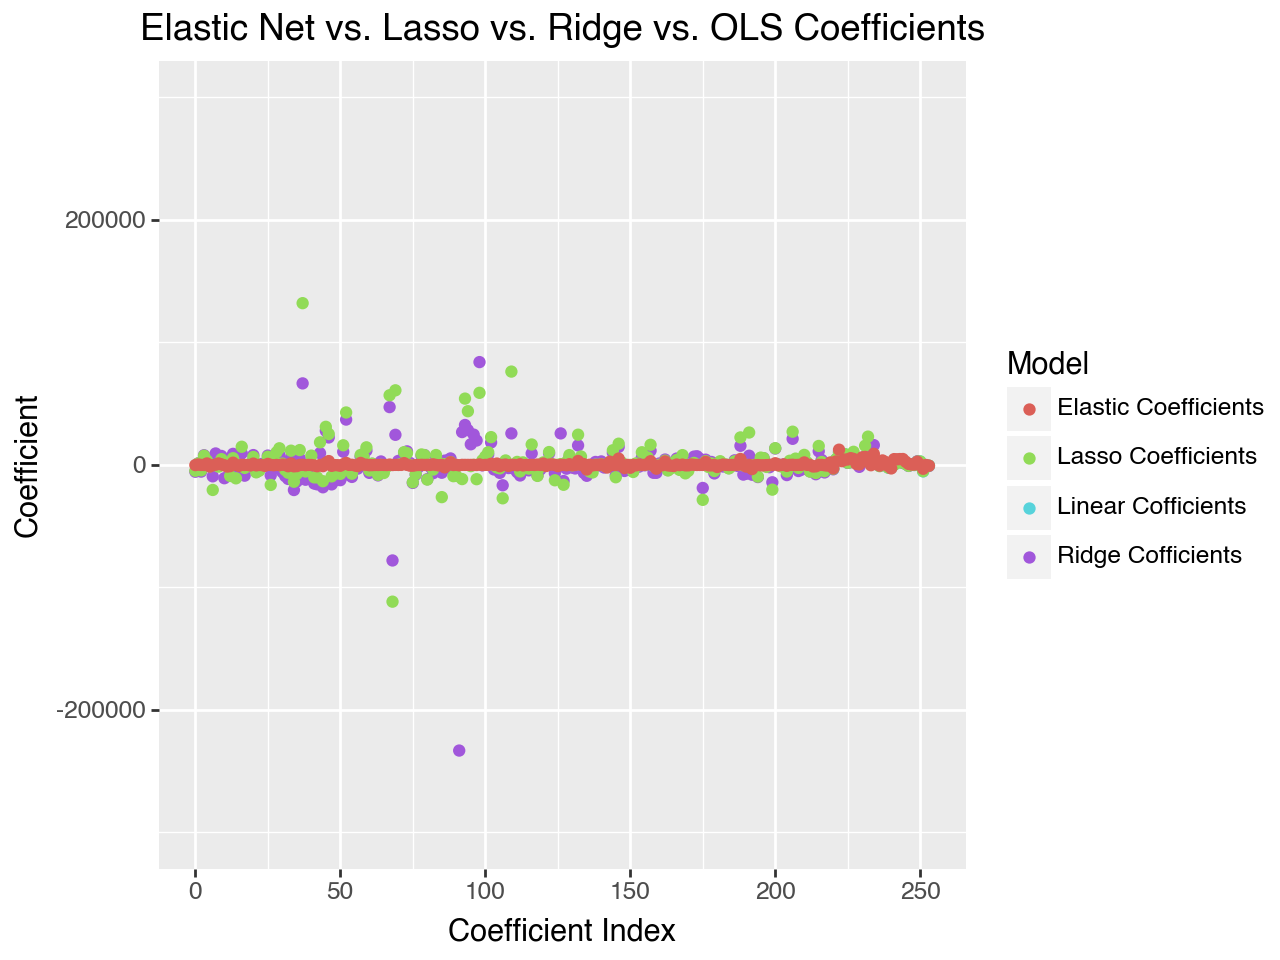

In [124]:
coefficients_df4 = pd.DataFrame({'Feature': feature_names,
                                 'Linear Cofficients': lr_coefficients,
                                 'Ridge Cofficients': ridge_coefficients,
                                 'Lasso Coefficients': lasso_coefficients,
                                 'Elastic Coefficients': default_elastic_net_coefficients})
plot_df = coefficients_df4[['Feature']].copy()
plot_df2 = pd.merge(plot_df, coefficients_df4, left_on = "Feature", right_on = "Feature")
plot_df2 =  plot_df2.reset_index()
plot_df2 = pd.melt(plot_df2, id_vars = ["index", "Feature"], value_vars= ["Linear Cofficients", "Ridge Cofficients", "Lasso Coefficients", "Elastic Coefficients"], var_name = "Model", value_name = "Coefficient")
(ggplot(plot_df2, aes(x = "index", y = "Coefficient", color = "Model"))+
    geom_point()+
    labs(title = "Elastic Net vs. Lasso vs. Ridge vs. OLS Coefficients",
         x = "Coefficient Index",
         y = "Coefficient")+
    scale_y_continuous(limits = (-300000, 300000)))